### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

### Explore Dataset

In [2]:
data = pd.read_csv('Angrytweets.csv', index_col=[0])
data.shape

(8901, 25)

In [3]:
data.columns

Index(['retrieved_at', 'tweet_id', 'tweet_created_at', 'sensitive', 'lang',
       'source', 'username', 'user_id', 'text', 'in_reply_to_id', 'rt_count',
       'reply_count', 'like_count', 'quote_count', 'has_media',
       'if_video_duration', 'if_video_views', 'tweet_url', 'ent_hashtags',
       'ent_mentions', 'ent_anotation_types', 'ent_anotation_elements',
       'place_id', 'place_name', 'coordinates'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None)
data.head(5)

,retrieved_at,tweet_id,tweet_created_at,sensitive,lang,source,username,user_id,text,in_reply_to_id,rt_count,reply_count,like_count,quote_count,has_media,if_video_duration,if_video_views,tweet_url,ent_hashtags,ent_mentions,ent_anotation_types,ent_anotation_elements,place_id,place_name,coordinates
0,2022-04-15 23:10:59.933382,1487922145514639365,2022-01-30T22:54:18.000Z,False,en,Twitter for Android,redboneirish19,854908276512702464,@RepAdamSchiff What I 👀/👂 Trump actually suppo...,29501253,0,0,0,0,false,0.0,0,https://twitter.com/redboneirish19/status/1487...,false,RepAdamSchiff,Person;Place;Person,Trump;Capitol;Trump,false,false,False
1,2022-04-15 23:10:59.933382,1487908143027867648,2022-01-30T21:58:39.000Z,False,en,Twitter for iPhone,DebbieSVA,1086976130819809280,@FoxNews Bull 😡\n\nHe refused to pardon anyone...,1367531,0,0,4,0,false,0.0,0,https://twitter.com/DebbieSVA/status/148790814...,false,FoxNews,Person;Person,Bannon;Trump,false,false,False
2,2022-04-15 23:10:59.933382,1487897228232568837,2022-01-30T21:15:17.000Z,False,en,Twitter for iPhone,DebbieSVA,1086976130819809280,@TeddyHaslitt @bigfamilytwins @Jim_Jordan I di...,1456578960704299011,0,2,0,0,false,0.0,0,https://twitter.com/DebbieSVA/status/148789722...,false,TeddyHaslitt;bigfamilytwins;Jim_Jordan,Place;Place,Capitol;Capitol,false,false,False
3,2022-04-15 23:10:59.933382,1487873819012444161,2022-01-30T19:42:16.000Z,False,en,Twitter for iPhone,DebbieSVA,1086976130819809280,@TeddyHaslitt @bigfamilytwins @Jim_Jordan List...,1456578960704299011,0,0,0,0,false,0.0,0,https://twitter.com/DebbieSVA/status/148787381...,false,TeddyHaslitt;bigfamilytwins;Jim_Jordan,Person,Teddy,false,false,False
4,2022-04-15 23:10:59.933382,1487871999636647941,2022-01-30T19:35:02.000Z,False,en,Twitter for iPhone,DebbieSVA,1086976130819809280,@TeddyHaslitt @bigfamilytwins @Jim_Jordan Umm ...,1456578960704299011,0,0,0,0,false,0.0,0,https://twitter.com/DebbieSVA/status/148787199...,false,TeddyHaslitt;bigfamilytwins;Jim_Jordan,Person,Teddy,false,false,False


In [5]:
data.isnull().sum()

retrieved_at              0
tweet_id                  0
tweet_created_at          0
sensitive                 0
lang                      0
source                    0
username                  0
user_id                   0
text                      0
in_reply_to_id            0
rt_count                  0
reply_count               0
like_count                0
quote_count               0
has_media                 0
if_video_duration         0
if_video_views            0
tweet_url                 0
ent_hashtags              0
ent_mentions              0
ent_anotation_types       0
ent_anotation_elements    0
place_id                  0
place_name                0
coordinates               0
dtype: int64

In [6]:
data.dtypes

retrieved_at               object
tweet_id                    int64
tweet_created_at           object
sensitive                    bool
lang                       object
source                     object
username                   object
user_id                     int64
text                       object
in_reply_to_id             object
rt_count                    int64
reply_count                 int64
like_count                  int64
quote_count                 int64
has_media                  object
if_video_duration         float64
if_video_views              int64
tweet_url                  object
ent_hashtags               object
ent_mentions               object
ent_anotation_types        object
ent_anotation_elements     object
place_id                   object
place_name                 object
coordinates                  bool
dtype: object

### Data Visualization

In [7]:
# convert tweet_created_at column to datetime
data['tweet_date_convert'] = pd.to_datetime(data['tweet_created_at'])
# add a column for Year
data['tweet_month'] = data['tweet_date_convert'].dt.to_period('M')
data.head(2)


,retrieved_at,tweet_id,tweet_created_at,sensitive,lang,source,username,user_id,text,in_reply_to_id,rt_count,reply_count,like_count,quote_count,has_media,if_video_duration,if_video_views,tweet_url,ent_hashtags,ent_mentions,ent_anotation_types,ent_anotation_elements,place_id,place_name,coordinates,tweet_date_convert,tweet_month
0,2022-04-15 23:10:59.933382,1487922145514639365,2022-01-30T22:54:18.000Z,False,en,Twitter for Android,redboneirish19,854908276512702464,@RepAdamSchiff What I 👀/👂 Trump actually suppo...,29501253,0,0,0,0,false,0.0,0,https://twitter.com/redboneirish19/status/1487...,false,RepAdamSchiff,Person;Place;Person,Trump;Capitol;Trump,false,false,False,2022-01-30 22:54:18+00:00,2022-01
1,2022-04-15 23:10:59.933382,1487908143027867648,2022-01-30T21:58:39.000Z,False,en,Twitter for iPhone,DebbieSVA,1086976130819809280,@FoxNews Bull 😡\n\nHe refused to pardon anyone...,1367531,0,0,4,0,false,0.0,0,https://twitter.com/DebbieSVA/status/148790814...,false,FoxNews,Person;Person,Bannon;Trump,false,false,False,2022-01-30 21:58:39+00:00,2022-01


In [8]:
data["tweet_month"].unique()

<PeriodArray>
['2022-01', '2021-11', '2021-12']
Length: 3, dtype: period[M]

### Frequency of sensitive tweeting among users

In [9]:
data_copy = data.copy()
data_copy['sensitive'] = data_copy['sensitive'].map({True: 1, False: 0})
#data_copy.head(2)   

In [10]:
sens_trend_data = data_copy[['tweet_month', 'sensitive']]
sens_trend_data.rename(columns={"tweet_month": "Month", "sensitive": "Sensitive content"}, inplace=True)
#sens_trend_data.head(2)

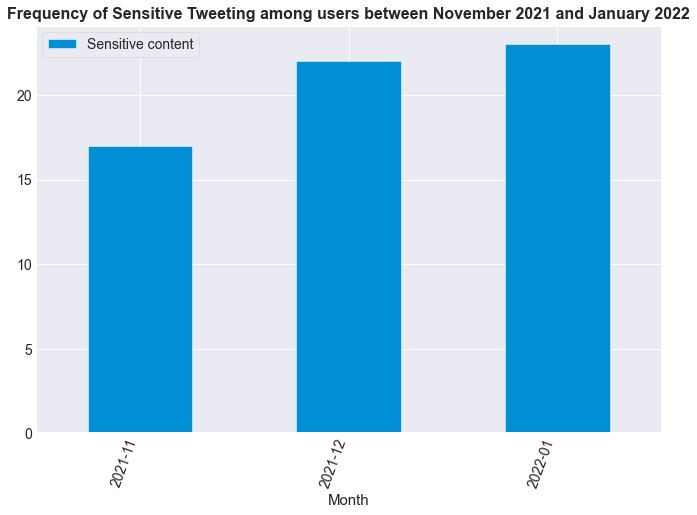

In [11]:
bar_df = sens_trend_data.groupby(by='Month').sum()

plt.rcParams["figure.figsize"] = (10,7)
bar_df.plot(y='Sensitive content',kind='bar')
plt.xticks(rotation=70, ha='right')
plt.xlabel("Month", fontdict = {"fontsize": 15})
plt.title("Frequency of Sensitive Tweeting among users between November 2021 and January 2022", fontdict={"fontsize": 16, "fontweight": "bold"})

plt.show()

In [12]:
data_copy2 = data.copy()
data_copy2['sensitive'] = data_copy2['sensitive'].map({True: "Sensitive tweets", False: "Non-sensitive tweets"})
#data_copy2.head(2)   

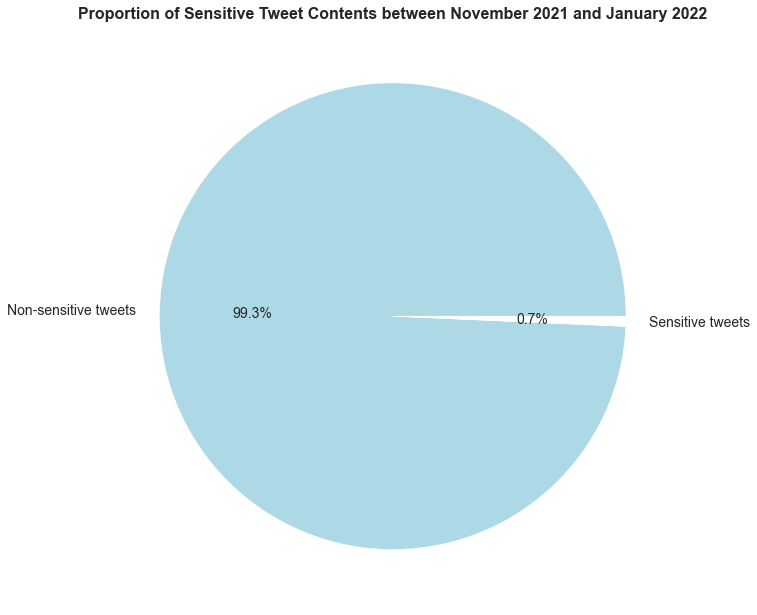

In [13]:
sens_pie_data = data_copy2.groupby('sensitive').agg('count')
plt.figure(figsize= (15,10))
plt.pie(sens_pie_data.tweet_created_at, labels = sens_pie_data.index, autopct='%1.1f%%',colors = ['lightblue', 'white'])
plt.title("Proportion of Sensitive Tweet Contents between November 2021 and January 2022", fontdict = {"fontsize": 16, "fontweight": "bold"})

plt.show()

## Most trending topics and hashtags

In [14]:
pop_tweets_df = data[["sensitive","tweet_month", "reply_count", "like_count",'rt_count' ,"ent_anotation_elements", "ent_mentions",'ent_hashtags', "lang"]]
pop_tweets_df.rename(columns= {"ent_hashtags":"Hashtags","rt_count":"Retweets","like_count":"Likes","lang":"Language","tweet_month":"Month","reply_count":"Replies"}, inplace=True)
pop_tweets_df.head(2)

,sensitive,Month,Replies,Likes,Retweets,ent_anotation_elements,ent_mentions,Hashtags,Language
0,False,2022-01,0,0,0,Trump;Capitol;Trump,RepAdamSchiff,false,en
1,False,2022-01,0,4,0,Bannon;Trump,FoxNews,false,en


In [15]:
pop_tweets= pop_tweets_df.nlargest(10, ["Likes","Retweets"])
pop_tweets

,sensitive,Month,Replies,Likes,Retweets,ent_anotation_elements,ent_mentions,Hashtags,Language
5528,False,2022-01,738,21688,4479,U.S. Capitol,false,false,en
7047,False,2021-12,61,1406,393,Trump;Capitol Hill;Taliban;Camp David,false,false,en
6621,False,2022-01,18,740,138,Mike Pence;Capitol;Pence;Trump,donwinslow;Mike_Pence,false,en
6413,False,2022-01,55,614,276,House Republican;Pelosi;US Capitol;GOP,false,false,en
5831,False,2022-01,41,256,77,🥺Liz Cheney;Cheney;Republicans,false,false,en
516,False,2022-01,10,236,155,Lauren Boebert;US Capitol,BurnettForCO3,CO03;DemVoice1,en
8479,False,2021-11,19,204,87,U.S.;Capitol;QAnon Shaman,false,DemVoice1;ONEV1;Dems4USA;wtpBLUE,en
313,False,2022-01,14,171,73,Boris Johnson;Carrie Johnson;Boris,false,DowningStreetParties;BorisJohnsonResign;Tories...,en
5982,False,2022-01,10,163,51,U.S. Capitol Police;Louie Gohmert;TX,TexasTribune,false,en
5828,False,2022-01,12,152,97,Pelosi;President Trump;Pelosi;CAPITOL,false,false,en


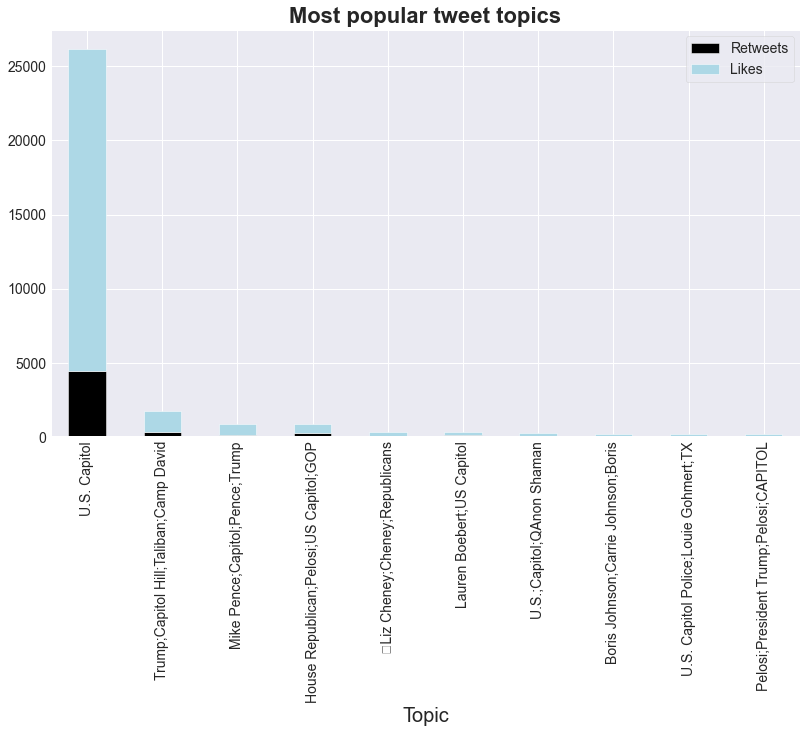

In [16]:
plt.rcParams["figure.figsize"] = (12,7)
plot = pop_tweets[['Retweets','Likes','ent_anotation_elements']].plot(x='ent_anotation_elements', kind='bar', stacked = True, color = ["black", 'lightblue'])
plot.set_xlabel("Topic", fontdict = {"fontsize": 20} )
plot.set_title("Most popular tweet topics", fontdict = {"fontsize": 22,"fontweight":"bold"})

plt.show()

#### Inference:   The most popular tweets are centred around happenings at the US Capitol, the Taliban, Republicans and Boris Johnson

In [17]:
hashtags_df= pop_tweets_df.groupby('Hashtags').sum().nlargest(11,"Retweets")
hashtags_df.drop('false', inplace=True)
hashtags_df

,sensitive,Replies,Likes,Retweets
Hashtags,,,,
DemVoice1;ONEV1,1,0,0,7308
DowningStreetParties,0,0,0,5256
WI03,0,0,0,2808
PartyGate,0,22,283,1874
Factcheck;GOP;false,3,0,0,870
Friday;January2022;January6thInsurrection,0,0,0,841
Jan6,0,1,2,486
PMQs;JohnsonOut;GTTO,0,0,0,361
BreakingNews,0,2,17,240


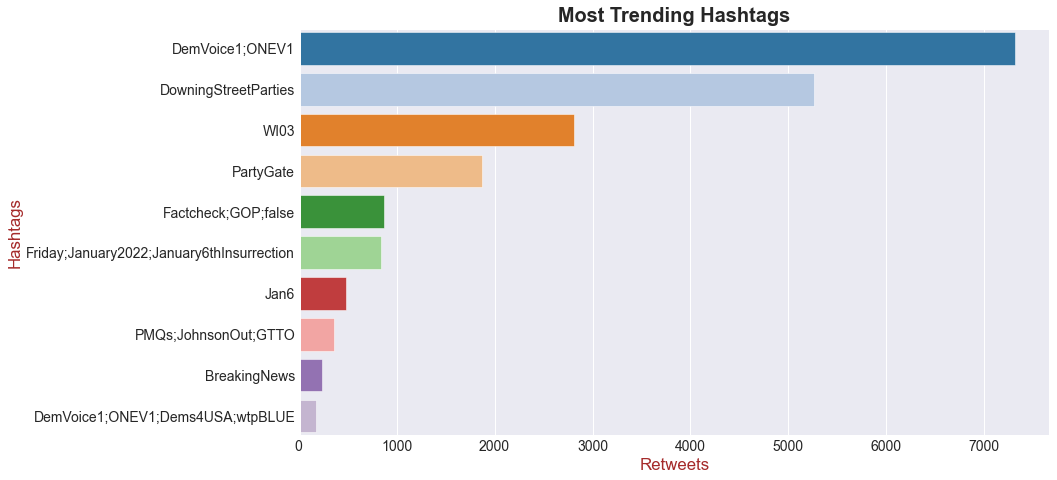

In [18]:
plot=sns.barplot(data = hashtags_df, x = "Retweets", y = hashtags_df.index, palette = "tab20")
plot.set_title("Most Trending Hashtags", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plot.set_xlabel("Retweets", color="brown")
plot.set_ylabel("Hashtags",color="brown")

plt.show() 

#### Inference:       Among the most trending hashtags, 2 hashtags linked to sensitive comments, fell among the top 5 most retweeted hashtags, suggesting an increasing support among twiiter users of sensitive tweeting behaviour

## Language engagement among users

In [19]:
lang_df=pop_tweets_df.groupby(['Language','Month']).sum()
lang_df.reset_index(inplace=True)
lang_df["Language engagement"] = lang_df.Replies + lang_df.Likes + lang_df.Retweets

lang_df["Language"]  = lang_df["Language"].map({'ca': 'Catalan','de':"German" ,'en': "English", 'es':'Spanish', 'et':'Estonian',
                                               'fi':'Finnish', 'fr':'French', 'ht':'Haitian', 'it':'Italian', 'nl':'Dutch',
                                                'pt':'Portuguese', 'ro':'Romanian', 'tl':'Tagalog'})

lang_df['Month'] = lang_df['Month'].astype(str)

lang_df["Month"]  = lang_df["Month"].map({'2021-11':'Nov, 2021','2021-12':"Dec, 2021" ,'2022-01': "Jan, 2022"})

lang_df["Language"].unique()

array(['Catalan', 'German', 'English', 'Spanish', 'Estonian', 'Finnish',
       'French', 'Haitian', 'Italian', 'Dutch', 'Portuguese', 'Romanian',
       'Tagalog', nan], dtype=object)

In [20]:
lang_df.dropna(inplace=True)
lang_df.drop(lang_df.index[lang_df['Language engagement'] == 0], inplace=True)
lang_df["Language"].unique()

array(['Catalan', 'German', 'English', 'French', 'Haitian', 'Italian',
       'Dutch', 'Tagalog'], dtype=object)

In [21]:
lang_df

,Language,Month,sensitive,Replies,Likes,Retweets,Language engagement
0,Catalan,"Dec, 2021",0,1,12,2,15
1,Catalan,"Jan, 2022",0,0,13,4,17
2,German,"Dec, 2021",0,0,18,2,20
3,English,"Nov, 2021",16,179,1587,183173,184939
4,English,"Dec, 2021",22,258,3119,188085,191462
5,English,"Jan, 2022",23,1314,26884,18676009,18704207
9,French,"Nov, 2021",0,0,1,2,3
11,French,"Jan, 2022",0,2,3,20,25
12,Haitian,"Jan, 2022",0,0,17,2,19
13,Italian,"Dec, 2021",0,2,12,72,86


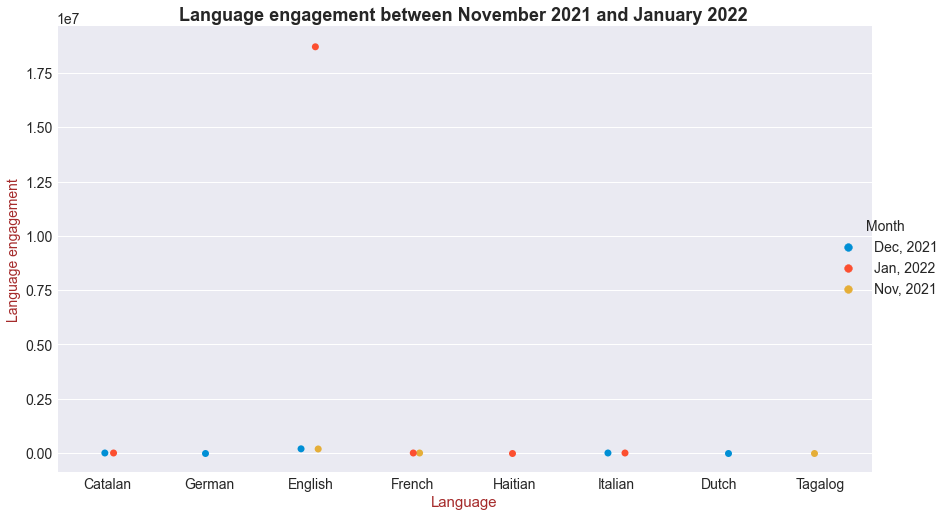

In [22]:
plot = sns.catplot(x = "Language", y = "Language engagement", s= 7, hue = "Month", data = lang_df, aspect=4)
plot.fig.set_figwidth(13)
plot.fig.set_figheight(8)
plot.set_xlabels("Language", color="brown", fontdict= {"fontsize":"15"})
plot.set_ylabels("Language engagement", color="brown", fontdict= {"fontsize":"14"})
plt.title("Language engagement between November 2021 and January 2022", fontdict= {"fontsize":"18", "fontweight":"bold"})

plt.show()